## The Sparks Foundation: GRIP MAY-2021
## Data Science & Business Analytics Intern

### Author: Anupriya Dongare

## TASK-2: Prediction using Unsupervised ML
### Aim : Prediction of the optimum number of clusters from the given Iris dataset and represent it visually.

### K-means Clustering:
 - K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
 - Clustering is the act of grouping data that shares similar characteristics. In machine learning, clustering is used when there are no pre-specified labels of data available, i.e. we don’t know what kind of groupings to create. The goal is to group together data into similar classes such that:
     - Intra-class similarity is high 
     - Inter-class similarity is low
 - Objective of K-means is to group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.
 - A cluster refers to a collection of data points aggregated together because of certain similarities.

 - K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

### Steps:
    1)Data Pre-processing
    2)Visualizing the data
    3)Finding the optimal number of clusters using the elbow method
    4)Training the K-means algorithm on the training dataset
    5)Visualizing the clusters

## 1) Data Pre-processing

### Importing Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Importing the Dataset

In [2]:
#Importing Iris dataset
iris_dataset = pd.read_csv("Iris.csv")
print("Iris dataset loaded successfully!!!")

Iris dataset loaded successfully!!!


In [3]:
## Iris Dataset can also be imported like this 

#from sklearn.datasets import load_iris

#iris = load_iris()
#iris_dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
#iris_dataset.head()

In [4]:
iris_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_dataset.shape

(150, 6)

In [7]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# Gives statistical description about Iris dataset
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
# Check if any value is null
print(iris_dataset.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [10]:
# Drop the duplicate rows of data

iris_dataset = iris_dataset.drop_duplicates()


In [11]:
iris_dataset.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [12]:
# checking unique records in species
iris_dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
# checking total number of records for target variable i.e species
iris_dataset["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [14]:
# Id column is not a real feature. So, I will drop that.
iris_dataset=iris_dataset.drop(['Id'], axis = 1)

# columns in dataset after dropping the features which are not required
iris_dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## 2) Visualizing of Iris Data

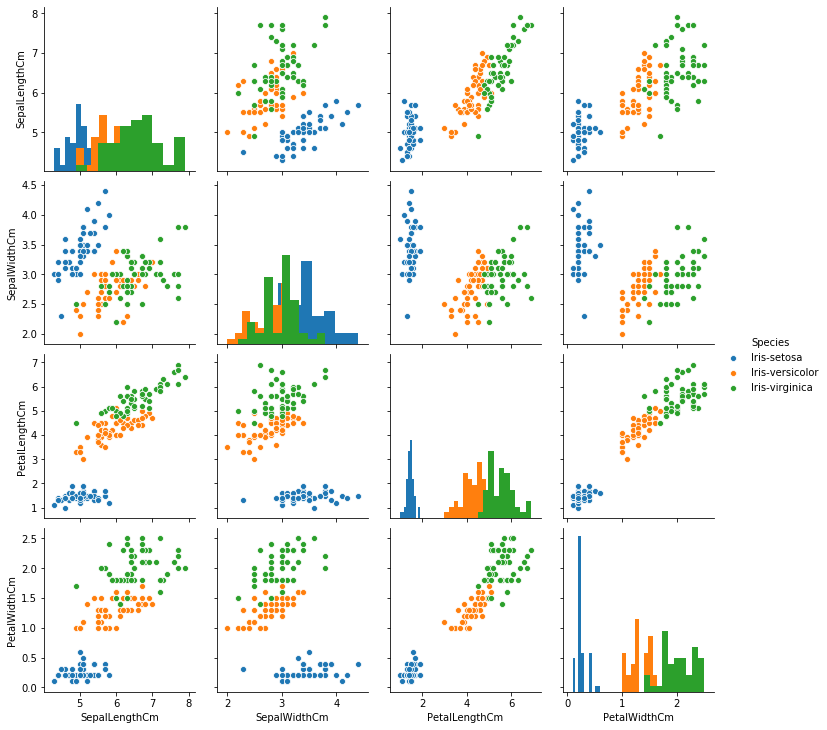

In [15]:
sns.pairplot(iris_dataset, hue = "Species", diag_kind="hist")

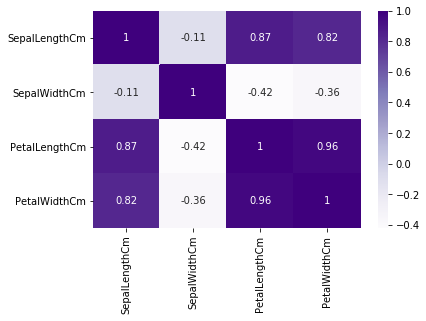

In [16]:
#correlation matrix using heatmap to check dependency between variables
sns.heatmap(iris_dataset.corr(), cmap = "Purples", annot = True)

#annot = True: write the data value in each cell

####   The darker ones are the highly corelated variables and the lighter ones are negatively corelated variables.
- Also, we can see from above plot that PetalLengthCm is highly related to PetalWidthCm and SepalLengthCm is not that much related to SepalWidthCm.

In [17]:
# Also, we don't require target variable(Species) of our flowers. So, I will drop that also.
iris_dataset=iris_dataset.drop(['Species'], axis = 1)

# columns in dataset after dropping
iris_dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

### Extracting Independent Variables

- The iloc function is used to get the features we require and '.values' function to get an array of the dataset.

In [18]:
# Getting all feature columns of iris flower

#x = iris_dataset.iloc[:, [0, 1, 2, 3]].values
#print(x)

In [19]:
# Getting only 1st and 3rd feature columns of iris flower

x = iris_dataset.iloc[:, [0, 2]].values
print(x)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [20]:
# Getting only 2nd and 4th feature columns of iris flower

#w = iris_dataset.iloc[:, [1, 3]].values
#print(w)

## 3) Finding the optimal number of clusters using the elbow method

In [21]:
# importing  KMeans class

from sklearn.cluster import KMeans  

wcss_list= []  #Initializing the list for the values of WCSS(Within Cluster Sum of Squares)  
  
# Using for loop for iterations from 1 to 10.  

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)  
    kmeans.fit(x)  #fitted the model on a matrix of features
    wcss_list.append(kmeans.inertia_)  # kmeans.inertia_ returns the WCSS value for an initialized cluster
      

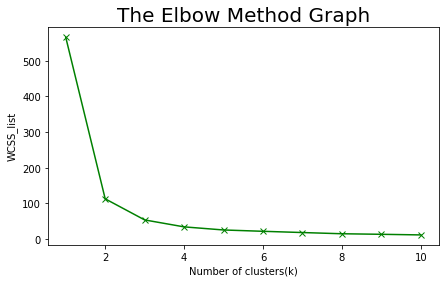

In [22]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'.

plt.figure(figsize=(7,4))
plt.plot(range(1, 11), wcss_list, 'bx-', color = 'green')
plt.title('The Elbow Method Graph', fontsize = 20)
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS_list') # Within cluster sum of squares
plt.show()

- From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 
  ### From this, we choose the number of clusters as 3.

## 4) Training the K-means algorithm on the training dataset

In [23]:
# Training the K-means model on a dataset / Creating the kmeans classifier (Fitting K-means to the dataset)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


- Here 0,1 and 2 are the labels of species: setosa, versicolor and virginica.

In [24]:
print(type(x))

<class 'numpy.ndarray'>


## 5) Visualizing the Clusters

- The last step is to visualize the clusters

In [25]:
iris_dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [26]:
kmeans.cluster_centers_ # For finding the centroids/centers of the clusters formed

array([[5.00784314, 1.49411765],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

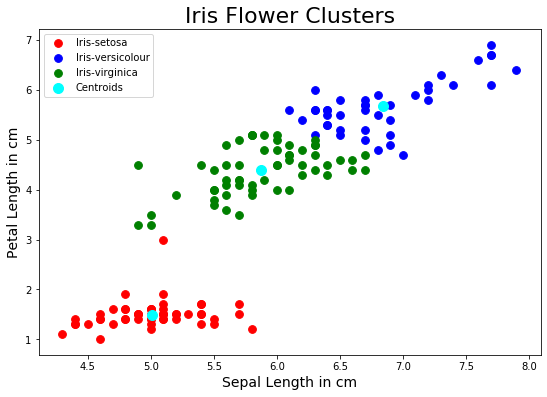

In [27]:
# Visualising the clusters On the basis of 1st and 3rd columns, i.e. SepalLengthCm and PetalLengthCm

plt.figure(figsize=(9,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'Cyan', label = 'Centroids')
plt.legend(loc="best")
plt.xlabel('Sepal Length in cm', fontsize = 14)
plt.ylabel('Petal Length in cm', fontsize = 14)
plt.title('Iris Flower Clusters', fontsize = 22)
plt.show()

- Hence, we got optimum number of clusters of iris dataset is 3 and also visualized the clusters with the help of scatter plot.

## Thank You!